<a href="https://colab.research.google.com/github/HamidBekamiri/Econometrics-II/blob/main/01_DataScienceOverview_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Classical ML

![](images/bannerSupervised-vs.-Unsupervised-Learning-1.webp)

This section introduces the concept of classical machine learning, which encompasses both supervised and unsupervised learning techniques. The image provides a visual representation of the differences between these two main categories of machine learning algorithms.

# Unsupervised Learning: Clustering

------------------------------------------------------------------------

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/nba_Clustering_yale.png)

Unsupervised learning, particularly clustering, is a technique used to group similar data points without predefined labels. In this section, we'll explore clustering using NBA player data, demonstrating how we can identify patterns and groupings based on player statistics.


In [1]:
#------------------
# Data Preparation
#------------------

#Read datasets
#Download the data from http://www.saedsayad.com/datasets/BikeRental.zip
df <- read.csv("https://raw.githubusercontent.com/aaubs/ds-master/main/data/NBA_Data.csv")

#Rows and Cols
dim(df)

#Columns name
colnames(df)

# Omitting any NA values
df <- na.omit(df)

#Show
head(df)

[1] 530  30

[1] "Unnamed..0" "PLAYER"     "TEAM"       "AGE"        "GP"        
 [6] "W"          "L"          "MIN"        "PTS"        "FGM"       
[11] "FGA"        "FG."        "X3PM"       "X3PA"       "X3P."      
[16] "FTM"        "FTA"        "FT."        "OREB"       "DREB"      
[21] "REB"        "AST"        "TOV"        "STL"        "BLK"       
[26] "PF"         "FP"         "DD2"        "TD3"        "X..."

,Unnamed..0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,⋯,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,1,James Harden,HOU,29,78,51,27,36.8,36.1,10.8,⋯,6.6,7.5,5.0,2.0,0.7,3.1,58.7,34,7,4.6
2,2,Paul George,OKC,29,77,46,31,36.9,28.0,9.2,⋯,8.2,4.1,2.7,2.2,0.4,2.8,49.3,24,1,6.4
3,3,Giannis Antetokounmpo,MIL,24,72,56,16,32.8,27.7,10.0,⋯,12.5,5.9,3.7,1.3,1.5,3.2,56.2,54,5,9.1
4,4,Joel Embiid,PHI,25,64,43,21,33.7,27.5,9.1,⋯,13.6,3.7,3.5,0.7,1.9,3.3,53.7,58,2,5.8
5,5,LeBron James,LAL,34,55,28,27,35.2,27.4,10.1,⋯,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1
6,6,Stephen Curry,GSW,31,69,52,17,33.8,27.3,9.2,⋯,5.3,5.2,2.8,1.3,0.4,2.4,43.8,3,0,10.0


## Basketball Player Statistics Explanation

- **'PLAYER'**: The name of the basketball player.

- **'TEAM'**: The abbreviation of the NBA team for which the player plays.

- **'AGE'**: The player’s age.

- **'GP'**: Games Played - the total number of games in which the player has participated in the season.

- **'W'**: Wins - the number of games won by the player’s team when they played.

- **'L'**: Losses - the number of games lost by the player’s team when they played.

- **'MIN'**: Minutes - total minutes the player has played over the season.

- **'PTS'**: Points - total points scored by the player.

- **'FGM'**: Field Goals Made - the number of successful shots made from general play.

- **'FGA'**: Field Goals Attempted - the total number of shots attempted by the player.

- **'FG%'**: Field Goal Percentage - the percentage of field goals made out of the attempts.

- **'3PM'**: Three-Point Field Goals Made - the number of successful three-point shots made.

- **'3PA'**: Three-Point Field Goals Attempted - the number of three-point shots attempted.

- **'3P%'**: Three-Point Percentage - the percentage of three-point shots made out of the attempts.

- **'FTM'**: Free Throws Made - the number of successful free throws.

- **'FTA'**: Free Throws Attempted - the total number of free throws attempted.

- **'FT%'**: Free Throw Percentage - the percentage of free throws made out of the attempts.

- **'OREB'**: Offensive Rebounds - the number of rebounds the player has grabbed that occurred on the offensive end of the floor.

- **'DREB'**: Defensive Rebounds - the number of rebounds the player has grabbed that occurred on the defensive end of the floor.

- **'REB'**: Total Rebounds - the total number of offensive and defensive rebounds.

- **'AST'**: Assists - the number of assists (passes leading directly to a score) made by the player.

- **'TOV'**: Turnovers - the number of times the player loses possession of the ball to the opposing team.

- **'STL'**: Steals - the number of times the player took the ball away from an opponent.

- **'BLK'**: Blocks - the number of opponent’s shots the player has deflected.

- **'PF'**: Personal Fouls - the number of personal fouls committed by the player.

- **'FP'**: Fantasy Points - points based on a player’s performance for fantasy sports.

- **'DD2'**: Double Doubles - the number of games in which a player accumulates double-digit totals in two of five statistical categories (points, rebounds, assists, steals, and blocks).

- **'TD3'**: Triple Doubles - the number of games in which a player accumulates double-digit totals in three of these categories.


In this data preparation step, we load the NBA player data, examine its structure, and clean it by removing any rows with missing values. This ensures our dataset is ready for analysis and clustering.


Warning message in dist(df):
“NAs introduced by coercion”


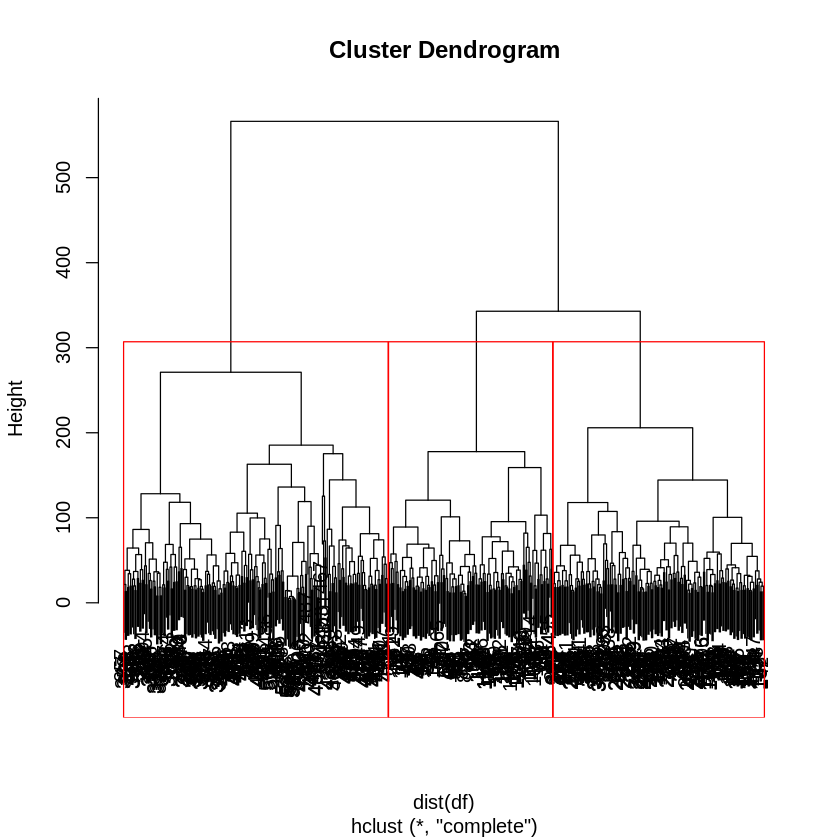

In [2]:
#-------------------------
# Hierarchical Clustering
#-------------------------

#Clusters
clusters <- hclust(dist(df), method='complete')

# Cut the dendrogram into a specified number of clusters, say 3
cluster_labels <- cutree(clusters, k=3)

# You can add the cluster labels to your data frame, for example:
df$cluster <- cluster_labels

# Plot the dendrogram
plot(clusters)

# Cut the dendrogram and visualize the clusters
rect.hclust(clusters, k = 3, border = "red")

Hierarchical clustering is an algorithm that groups similar objects into clusters. Here, we apply it to our NBA data, creating a dendrogram that visually represents the hierarchy of clusters. We then cut the dendrogram to form three distinct clusters, which could represent different player types or roles.

In [3]:
table(df$cluster)


  1   2   3 
136 175 219 

In [4]:
summary(df[df$cluster == 1, c(3:7)])

     TEAM                AGE              GP              W        
 Length:136         Min.   :19.00   Min.   : 1.00   Min.   : 1.00  
 Class :character   1st Qu.:24.00   1st Qu.:59.75   1st Qu.:23.75  
 Mode  :character   Median :27.00   Median :72.00   Median :38.00  
                    Mean   :26.85   Mean   :65.89   Mean   :34.08  
                    3rd Qu.:30.00   3rd Qu.:78.25   3rd Qu.:45.25  
                    Max.   :37.00   Max.   :82.00   Max.   :60.00  
       L        
 Min.   : 0.00  
 1st Qu.:24.00  
 Median :32.00  
 Mean   :31.81  
 3rd Qu.:39.00  
 Max.   :63.00  

This command displays the column names of our dataframe, allowing us to see what features we have available for our analysis.


             Length Class  Mode   
cluster      530    -none- numeric
centers        8    -none- numeric
totss          1    -none- numeric
withinss       4    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           4    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

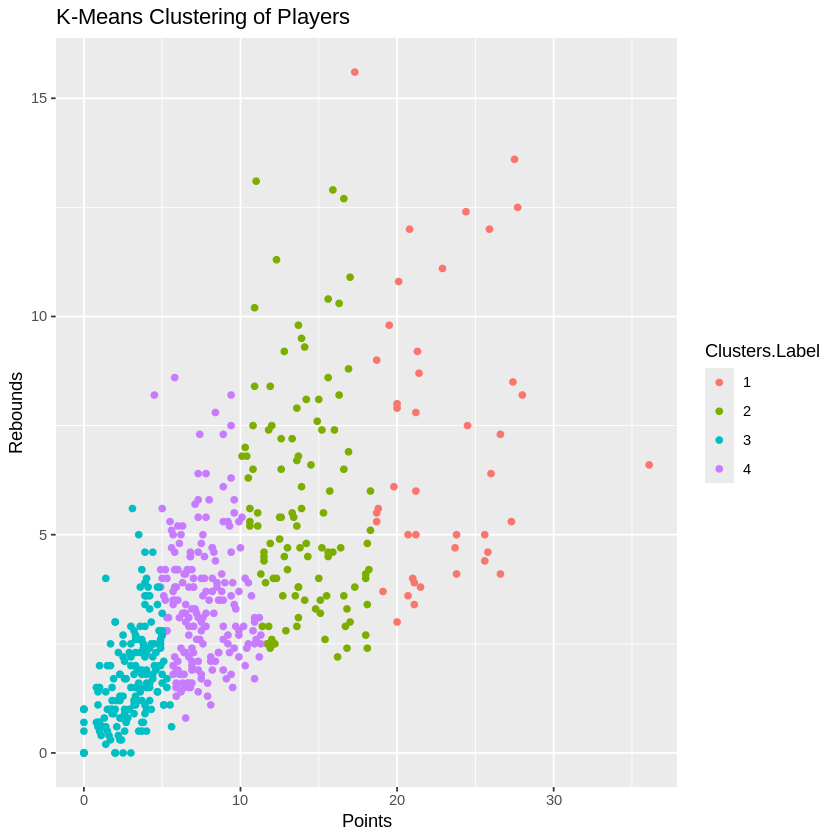

In [5]:
#--------------------
# K-Means Clustering
#--------------------
library(ggplot2)

# Clusters
Clusters <- kmeans(df[, c('PTS', 'REB')], centers = 4, nstart = 2)
summary(Clusters)

# Plot
Clusters.Label <- as.factor(Clusters$cluster)
ggplot(df, aes(x = PTS, y = REB, color = Clusters.Label)) +
  geom_point() +
  labs(title = "K-Means Clustering of Players", x = "Points", y = "Rebounds")



K-means clustering is another popular clustering algorithm. In this example, we use it to group players based on their points and rebounds. The resulting plot visualizes these clusters, potentially revealing different player archetypes based on their scoring and rebounding abilities.

# Supervised Learning: Classification

In this analysis, we aim to identify the key factors that influence a customer's decision to accept a personal loan offered by Universal Bank. The dataset we are working with contains various attributes related to customers, their financial behavior, and banking preferences. These attributes include:

-   **ID**: A unique identifier for each customer.

-   **Personal Loan**: A binary variable indicating whether the customer accepted the personal loan offered (1=Yes, 0=No).

-   **Age**: The age of the customer.

-   **Experience**: The number of years of professional experience.

-   **Income**: The annual income of the customer in thousands of dollars (\$000).

-   **Zip Code**: The customer's home address zip code.

-   **Family**: The size of the customer's family.

-   **CCAvg**: The average monthly spending on credit cards in thousands of dollars (\$000).

-   **Education**: The customer's education level, categorized as (1) undergraduate, (2) graduate, or (3) advanced/professional.

-   **Mortgage**: The value of the customer's house mortgage in thousands of dollars (\$000).

-   **Securities**: A binary variable indicating whether the customer has a securities account with the bank (1=Yes, 0=No).

-   **CDAccount**: A binary variable indicating whether the customer has a certificate of deposit with the bank (1=Yes, 0=No).

-   **Online**: A binary variable indicating whether the customer uses Internet banking facilities (1=Yes, 0=No).

-   **CreditCard**: A binary variable indicating whether the customer uses a credit card issued by \* **Universal Bank** (1=Yes, 0=No).

This section introduces supervised learning, specifically classification. We'll be working with a dataset containing customer information to predict whether a customer will accept a personal loan. This type of problem is common in finance and marketing.

In [6]:
# Create the input data frame.
data <- read.csv("https://raw.githubusercontent.com/w3hbi/personal_loan_acceptance_prediction/refs/heads/main/data/UniversalBank.csv")


head(data)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


Here we load our dataset and display the first few rows to get an initial understanding of its structure and contents.

In [7]:
colnames(data)

[1] "ID"                "Age"               "Experience"       
 [4] "Income"            "ZIP.Code"          "Family"           
 [7] "CCAvg"             "Education"         "Mortgage"         
[10] "PersonalLoan"      "SecuritiesAccount" "CDAccount"        
[13] "Online"            "CreditCard"


This command shows us the names of all columns in our dataset, giving us an overview of the available features for our classification task.

In [26]:
head(data$PersonalLoan)

[1] 0 0 0 0 0 0

This displays the 'PersonalLoan' column, which is our target variable for classification. It shows whether each customer accepted a personal loan (1) or not (0).

In [9]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [10]:
#------------------
# Data Preparation
#------------------

# Load the library
library(caTools)

# Set a seed for reproducibility
set.seed(123)

# Create a split using a 70% training data ratio
split <- sample.split(data$PersonalLoan, SplitRatio = 0.7)

# Subset the data into training and test sets
train <- subset(data, split == TRUE)
test <- subset(data, split == FALSE)


#Rows and Cols
dim(train)
dim(test)

#Columns name
colnames(train)
colnames(test)

#Show
head(train)
head(test)

[1] 3500   14

[1] 1500   14

[1] "ID"                "Age"               "Experience"       
 [4] "Income"            "ZIP.Code"          "Family"           
 [7] "CCAvg"             "Education"         "Mortgage"         
[10] "PersonalLoan"      "SecuritiesAccount" "CDAccount"        
[13] "Online"            "CreditCard"

[1] "ID"                "Age"               "Experience"       
 [4] "Income"            "ZIP.Code"          "Family"           
 [7] "CCAvg"             "Education"         "Mortgage"         
[10] "PersonalLoan"      "SecuritiesAccount" "CDAccount"        
[13] "Online"            "CreditCard"

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
3,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
6,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
9,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
10,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
4,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
8,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
12,12,29,5,45,90277,3,0.1,2,0,0,0,0,1,0
17,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0


In this data preparation step, we split our data into training and test sets. This is a crucial step in supervised learning, allowing us to train our model on one subset of the data and evaluate its performance on another, unseen subset.

In [11]:
# Install necessary packages
if(!require(rpart)) install.packages("rpart")
if(!require(rpart.plot)) install.packages("rpart.plot")

# Load the libraries
library(rpart)
library(rpart.plot)

Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



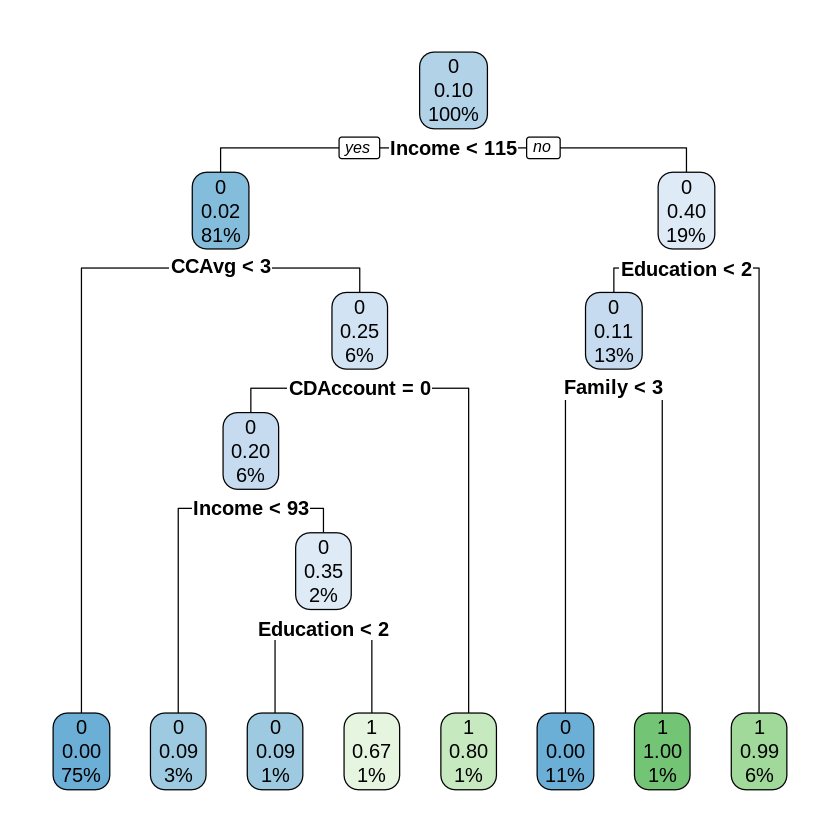

In [12]:
#------------------
# Decision Tree
#------------------
library(rpart)
library(rpart.plot)

# Build the decision tree model
dt_model <- rpart(PersonalLoan ~ ., data = train, method = "class")

# Plot the tree
rpart.plot(dt_model)

Here, we build and visualize a decision tree model. Decision trees are a popular classification algorithm due to their interpretability. The plot shows how the model makes decisions based on different features to classify customers.

In [13]:
#------------------
# Predictions and Accuracy for Training Data
#------------------

# Make predictions on the training set
train_predictions <- predict(dt_model, newdata = train, type = "class")

# Confusion matrix for training set
train_confusion <- table(Predicted = train_predictions, Actual = train$PersonalLoan)
print("Training Confusion Matrix:")
print(train_confusion)

# Accuracy for training set
train_accuracy <- sum(train_predictions == train$PersonalLoan) / nrow(train)
print(paste("Training Accuracy: ", round(train_accuracy * 100, 2), "%", sep = ""))

[1] "Training Confusion Matrix:"
         Actual
Predicted    0    1
        0 3144   25
        1   20  311
[1] "Training Accuracy: 98.71%"


In this section, we evaluate our model's performance on the training data. We generate predictions, create a confusion matrix, and calculate the accuracy. This gives us an initial idea of how well our model is performing, but it's important to note that this may be optimistic due to potential overfitting.

In [14]:
#------------------
# Predictions and Accuracy for Test Data
#------------------

# Make predictions on the test set
test_predictions <- predict(dt_model, newdata = test, type = "class")

# Confusion matrix for test set
test_confusion <- table(Predicted = test_predictions, Actual = test$PersonalLoan)
print("Test Confusion Matrix:")
print(test_confusion)

# Accuracy for test set
test_accuracy <- sum(test_predictions == test$PersonalLoan) / nrow(test)
print(paste("Test Accuracy: ", round(test_accuracy * 100, 2), "%", sep = ""))

[1] "Test Confusion Matrix:"
         Actual
Predicted    0    1
        0 1349   13
        1    7  131
[1] "Test Accuracy: 98.67%"


Finally, we evaluate our model's performance on the test data. This gives us a more realistic estimate of how well our model will perform on new, unseen data. The confusion matrix and accuracy metric provide insights into the model's strengths and weaknesses in classifying loan acceptance.

# Exercise 1: Classical ML

You are provided with two datasets. For each dataset, perform the following tasks:

1.  **Identify the Type of Learning:**

    -   Determine whether the dataset is best suited for **Supervised Machine Learning (SML)** or **Unsupervised Machine Learning (UML)**.

2.  **Select the Appropriate Model (if SML is applicable):**

    -   If the dataset requires Supervised Machine Learning, decide whether to use a **classification** model or a **regression** model.

This exercise challenges you to apply your understanding of machine learning concepts to real datasets. It requires you to distinguish between supervised and unsupervised learning problems, and further classify supervised problems into classification or regression tasks.

In [15]:
install.packages("ISLR")
install.packages("tibble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(ISLR)
library(tibble)
head(as_tibble(Default))

default,student,balance,income
<fct>,<fct>,<dbl>,<dbl>
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


Here we load the 'Default' dataset from the ISLR package and convert it to a tibble for easier viewing. This dataset contains information about credit card defaults.

In [17]:
table(Default$default)


  No  Yes 
9667  333 

This command shows the distribution of the 'default' variable in our dataset. It helps us understand the balance of our classes in this classification problem.

[1] 7000    4

[1] 3000    4

[1] "default" "student" "balance" "income"

[1] "default" "student" "balance" "income"

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
3,No,No,1073.5492,31767.139
6,No,Yes,919.5885,7491.559
7,No,No,825.5133,24905.227
9,No,No,1161.0579,37468.529
10,No,No,0.0000,29275.268


,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
2,No,Yes,817.1804,12106.13
4,No,No,529.2506,35704.49
5,No,No,785.6559,38463.50
8,No,Yes,808.6675,17600.45
11,No,Yes,0.0000,21871.07
16,No,No,286.2326,45042.41


[1] "Training Confusion Matrix:"
         Actual
Predicted   No  Yes
      No  6742  149
      Yes   25   84
[1] "Training Accuracy: 97.51%"


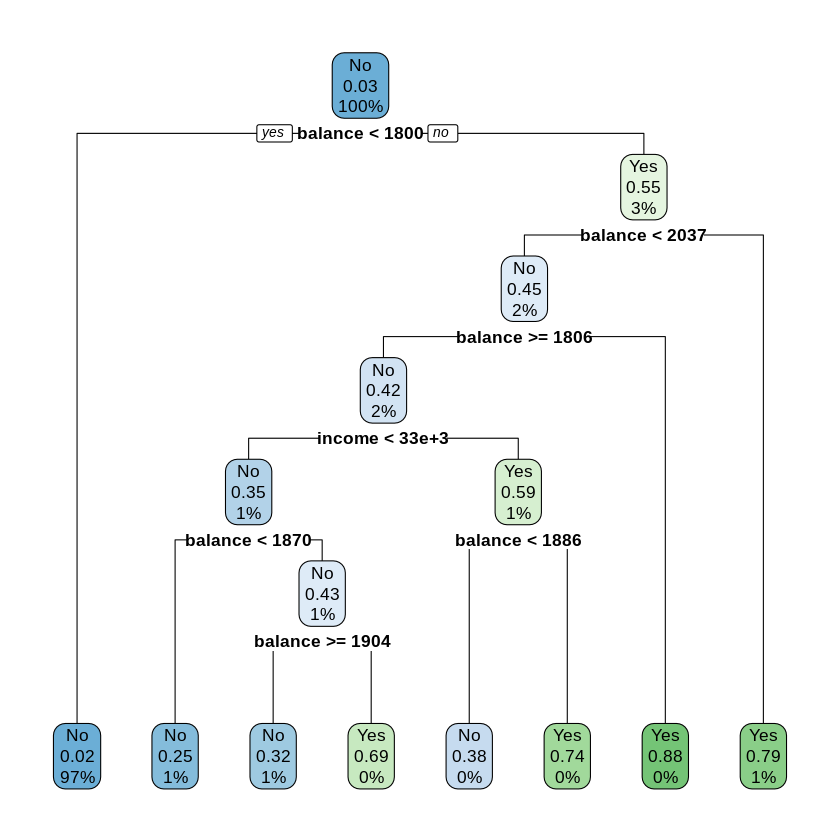

In [18]:
# Load the library
library(caTools)
library(rpart)
library(rpart.plot)

#------------------
# Data Preparation
#------------------

# Load the library
library(caTools)

# Set a seed for reproducibility
set.seed(123)

# Create a split using a 70% training data ratio
split <- sample.split(Default$default, SplitRatio = 0.7)

# Subset the data into training and test sets
train <- subset(Default, split == TRUE)
test <- subset(Default, split == FALSE)


#Rows and Cols
dim(train)
dim(test)

#Columns name
colnames(train)
colnames(test)

#Show
head(train)
head(test)

# Build the decision tree model
dt_model <- rpart(default ~ ., data = train, method = "class")

# Plot the tree
rpart.plot(dt_model)

#------------------
# Predictions and Accuracy for Training Data
#------------------

# Make predictions on the training set
train_predictions <- predict(dt_model, newdata = train, type = "class")

# Confusion matrix for training set
train_confusion <- table(Predicted = train_predictions, Actual = train$default)
print("Training Confusion Matrix:")
print(train_confusion)

# Accuracy for training set
train_accuracy <- sum(train_predictions == train$default) / nrow(train)
print(paste("Training Accuracy: ", round(train_accuracy * 100, 2), "%", sep = ""))

In [19]:
#------------------
# Predictions and Accuracy for Test Data
#------------------

# Make predictions on the test set
test_predictions <- predict(dt_model, newdata = test, type = "class")

# Confusion matrix for test set
test_confusion <- table(Predicted = test_predictions, Actual = test$default)
print("Test Confusion Matrix:")
print(test_confusion)

# Accuracy for test set
test_accuracy <- sum(test_predictions == test$default) / nrow(test)
print(paste("Test Accuracy: ", round(test_accuracy * 100, 2), "%", sep = ""))

[1] "Test Confusion Matrix:"
         Actual
Predicted   No  Yes
      No  2886   68
      Yes   14   32
[1] "Test Accuracy: 97.27%"


In this code block, we build and visualize a decision tree model for predicting credit card defaults. This is an example of a supervised classification task, as we're predicting a categorical outcome (default or no default) based on other features.

In [25]:
# Loading dataset
df <- mtcars

# Omitting any NA values
df <- na.omit(df)

# Scaling dataset
df <- scale(df)

head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


Here we prepare the 'mtcars' dataset for clustering. We remove any missing values and scale the features, which is an important step before applying many clustering algorithms. This dataset will be used for unsupervised learning.

Warning message in df$cluster <- cluster_labels:
“Coercing LHS to a list”


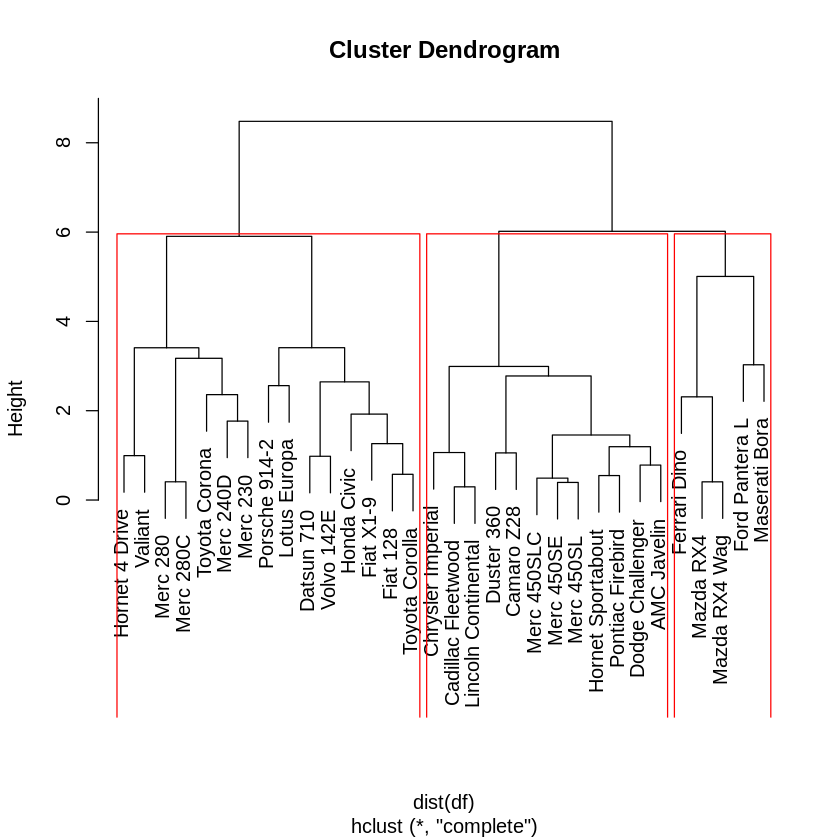

In [21]:
#-------------------------
# Hierarchical Clustering
#-------------------------

#Clusters
clusters <- hclust(dist(df), method='complete')

# Cut the dendrogram into a specified number of clusters, say 3
cluster_labels <- cutree(clusters, k=3)

# You can add the cluster labels to your data frame, for example:
df$cluster <- cluster_labels

# Plot the dendrogram
plot(clusters)

# Cut the dendrogram and visualize the clusters
rect.hclust(clusters, k = 3, border = "red")

This code block performs hierarchical clustering on the 'mtcars' dataset. The resulting dendrogram visualizes the hierarchy of clusters, and we cut it to form three distinct clusters. This is an example of unsupervised learning, as we're trying to find patterns in the data without predefined labels.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


             Length Class  Mode   
cluster      32     -none- numeric
centers       8     -none- numeric
totss         1     -none- numeric
withinss      4     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          4     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

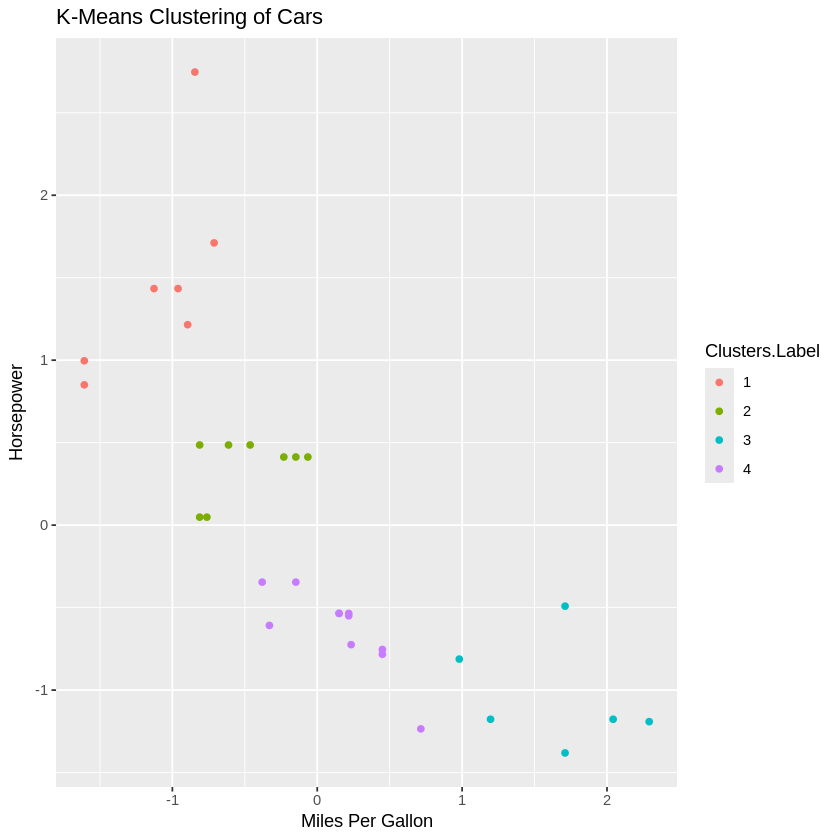

In [24]:
#--------------------
# K-Means Clustering
#--------------------
library(ggplot2)
# Library required for fviz_cluster function

# Loading dataset
df <- mtcars

# Omitting any NA values
df <- na.omit(df)

# Scaling dataset
df <- scale(df)

head(df)

# Clusters
Clusters <- kmeans(df[, c('mpg', 'hp')], centers = 4, nstart = 2)
summary(Clusters)

# Plot
Clusters.Label <- as.factor(Clusters$cluster)
ggplot(df, aes(x = mpg, y = hp, color = Clusters.Label)) +
  geom_point() +
  labs(title = "K-Means Clustering of Cars", x = "Miles Per Gallon", y = "Horsepower")


Finally, we apply K-means clustering to the 'mtcars' dataset, focusing on the 'mpg' and 'hp' variables. The resulting plot visualizes how cars are grouped based on these two features. This is another example of unsupervised learning, as we're discovering patterns in the data without predefined categories.
